<a href="https://colab.research.google.com/github/Eyeteebe/MLSalon/blob/master/resources/word2vec_skip_gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#preprocess and hyperparameters

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# raw data - setences
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

# make dictionary so that we can be reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# Making window size 1 skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # skipgrams - (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

#print(skip_grams)

# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        input_temp = [0]*voc_size
        input_temp[data[i][0]] = 1
        random_inputs.append(input_temp)  # target
        random_labels.append(data[i][1])  # context word

    return np.array(random_inputs), np.array(random_labels)

#hyperparameters
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 10
embedding_size = 2
n_hidden_1 = 5

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import time

class SkipGram(nn.Module):
    def __init__(self):
        super(SkipGram, self).__init__()
        #You need to use "bias=False" when you define Linear functions
        #***************put your code here***************
        self.linear1 = nn.Linear(voc_size, embedding_size, bias=False)
        self.linear2 = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, x):
        hidden = self.linear1(x)
        out = self.linear2(hidden)
        return out

skip_gram_model = SkipGram()
criterion = nn.CrossEntropyLoss() #please note we are using "CrossEntropyLoss" here
optimiser = optim.SGD(skip_gram_model.parameters(), lr=learning_rate)
weight1 = skip_gram_model.linear1.weight
trained_embeddings = weight1.detach().T.numpy()

"""%matplotlib inline
plt.ion()
plt.show()"""

for epoch in range(5000):

    inputs,labels = prepare_batch(skip_grams, batch_size)
    inputs_torch = torch.from_numpy(inputs).float()
    labels_torch = torch.from_numpy(labels)

    #***************put your code here***************
    skip_gram_model.train()

    # 1. zero grad
    optimiser.zero_grad()

    # 2. forword propagation
    outputs = skip_gram_model(inputs_torch)

    # 3. calculate loss
    loss = criterion(outputs, labels_torch)

    # 4. back propagation
    loss.backward()
    optimiser.step()

    if epoch % 500 == 499:
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss))
        """### Visualise result
        plt.cla()
        weight1 = skip_gram_model.linear1.weight
        trained_embeddings = weight1.detach().T.numpy()
        for i, label in enumerate(word_list):
            x, y = trained_embeddings[i]
            # print (label, " : ", x, " " , y)
            plt.scatter(x, y)
            plt.annotate(label, xy=(x, y), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom')
        plt.text(0, 0, 'Epoch: %d, loss: %.4f' %(epoch + 1, loss), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)"""


#Hint: you can refer lab1 to know how to get the weight from a Model Linear layer
weight1 = skip_gram_model.linear1.weight
trained_embeddings = weight1.detach().T.numpy()

Epoch: 500, loss: 1.9859
Epoch: 1000, loss: 1.6430
Epoch: 1500, loss: 1.9752
Epoch: 2000, loss: 2.0292
Epoch: 2500, loss: 1.9929
Epoch: 3000, loss: 2.5020
Epoch: 3500, loss: 1.7400
Epoch: 4000, loss: 2.3649
Epoch: 4500, loss: 2.0040
Epoch: 5000, loss: 1.9914


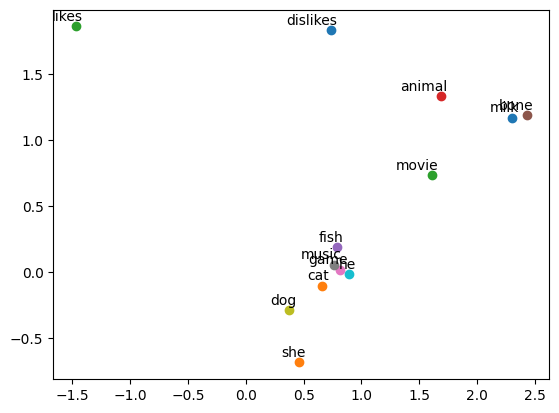

In [ ]:
### Visualise result
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    # print (label, " : ", x, " " , y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()